In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms

train_data = datasets.MNIST(root='./data_mnist/train/', train=True, transform=transforms.ToTensor(), download=False)
test_data = datasets.MNIST(root='./mnist_data/test/', train=False, transform=transforms.ToTensor(), download=False)

tr = torch.utils.data.DataLoader(dataset=train_data, batch_size=8, shuffle=True)
tst = torch.utils.data.DataLoader(dataset=test_data, batch_size=8, shuffle=False)

In [3]:
from model import VAE,VAEloss

layers = [784,512,256,128]
vae = VAE(layers)
if torch.cuda.is_available():
    vae.cuda()
vae.describe()

linear_enc1 (784, 512)
linear_enc2 (512, 256)
linear_enc4_mean (256, 128)
linear_enc4_std (256, 128)
linear_dec3 (128, 256)
linear_dec2 (256, 512)
linear_dec1 (512, 784)


In [4]:
import torch.optim as optim

optimizer = optim.Adam(vae.parameters())
criterion = VAEloss

In [5]:
loss_history = []
# acc_history = []
for epoch in range(10):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
        optimizer.zero_grad()
        y_pred, mean, logstd = vae(x.view(-1,784))
        loss = criterion(y_pred, x.view(-1,784), mean, logstd)
        x = loss.item()
        train_loss += x
        if (i%10000==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
#     acc_history.append(get_accuracy())
print('Finished Training')

(1,     1) item-loss: 4358.674804688
[1] epoch-loss: 8219306.298217773
(2,     1) item-loss: 1036.805541992
[2] epoch-loss: 6755803.571411133
(3,     1) item-loss: 823.045043945
[3] epoch-loss: 6538674.324279785
(4,     1) item-loss: 993.188110352
[4] epoch-loss: 6378905.755340576
(5,     1) item-loss: 1004.266906738
[5] epoch-loss: 6280602.630920410
(6,     1) item-loss: 778.865112305
[6] epoch-loss: 6222461.328277588
(7,     1) item-loss: 750.075317383
[7] epoch-loss: 6176205.699462891
(8,     1) item-loss: 833.206115723
[8] epoch-loss: 6143009.326416016
(9,     1) item-loss: 640.205444336
[9] epoch-loss: 6112868.628051758
(10,     1) item-loss: 825.910034180
[10] epoch-loss: 6089874.730346680
Finished Training


In [6]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [7]:
##saving the model
PATH = 'vae_mnist.pth'
torch.save(vae.state_dict(), PATH)
##loading the model
model = VAE(layers)
model.load_state_dict(torch.load(PATH))
model.eval()

VAE(
  (layers): ModuleDict(
    (linear_dec1): Linear(in_features=512, out_features=784, bias=True)
    (linear_dec2): Linear(in_features=256, out_features=512, bias=True)
    (linear_dec3): Linear(in_features=128, out_features=256, bias=True)
    (linear_enc1): Linear(in_features=784, out_features=512, bias=True)
    (linear_enc2): Linear(in_features=512, out_features=256, bias=True)
    (linear_enc4_mean): Linear(in_features=256, out_features=128, bias=True)
    (linear_enc4_std): Linear(in_features=256, out_features=128, bias=True)
  )
)

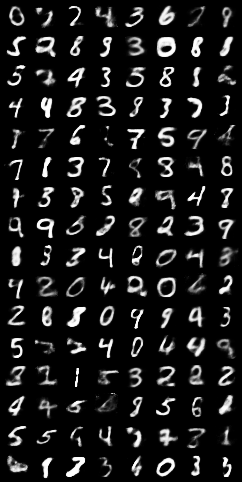

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.utils import save_image
from IPython.display import Image

sample = torch.randn(128, 128)
gen_x = model.decode(sample)
save_image(gen_x.view(128, 1, 28, 28).data.cpu(), 'sample_image.png')
Image('sample_image.png')
# gen_x = gen_x.cpu().detach().numpy()

# f = plt.figure()
# plt.imshow(gen_x)